In [19]:
import pandas as pd
import matplotlib.pyplot as plt

from keras.models import Sequential 
from keras.layers import Dense
from keras.optimizers import Adam

df = pd.read_csv("diabetes.csv")

x = df[["Pregnancies", "Glucose", "Insulin", "BMI", "Age"]]
y = df["Outcome"]

model = Sequential()

model.add(Dense(16, input_dim=5, activation="relu"))
model.add(Dense(1, activation="sigmoid"))

model.compile(loss="binary_crossentropy", optimizer=Adam(learning_rate=0.01), metrics=["accuracy"])

model.summary()





c:\Users\marcelo\Desktop\keras_model\.venv\Lib\site-packages\keras\src\layers\core\dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_17 (Dense)                │ (None, 16)             │            96 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_18 (Dense)                │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 113 (452.00 B)

 Trainable params: 113 (452.00 B)

 Non-trainable params: 0 (0.00 B)

In [20]:
num_epochs = 300
batch_size = 10 

history = model.fit(x,y, epochs=num_epochs, batch_size=batch_size, verbose=1)

Epoch 1/300
77/77 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5410 - loss: 6.8057
Epoch 2/300
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5010 - loss: 1.4024
Epoch 3/300
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6024 - loss: 0.7815
Epoch 4/300
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6086 - loss: 0.9198
Epoch 5/300
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5641 - loss: 0.8590
Epoch 6/300
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6273 - loss: 0.8308
Epoch 7/300
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6609 - loss: 0.7203
Epoch 8/300
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6573 - loss: 0.7267
Epoch 9/300
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6785 - loss: 0.6935
Epoch 10/300
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6564 - loss: 0.7073
Epoch 11/300
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6802 - loss: 0.6315
Epoch 12/300
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy:

In [21]:
x

,Pregnancies,Glucose,Insulin,BMI,Age
0,6,148,0,33.6,50
1,1,85,0,26.6,31
2,8,183,0,23.3,32
3,1,89,94,28.1,21
4,0,137,168,43.1,33
...,...,...,...,...,...
763,10,101,180,32.9,63
764,2,122,0,36.8,27
765,5,121,112,26.2,30
766,1,126,0,30.1,47


In [ ]:
import numpy as np

new_data = np.array([[2, 120, 150, 30.5, 25]])

prediction = model.predict(new_data)
print(prediction)

print("Probabilidad de tener diabetes:", prediction[0][0])

predicted_class = (prediction > 0.5).astype("int32")
print("Propenso a tener diabetes?: (0=no, 1=sí):", predicted_class[0][0])




1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
[[0.9991566]]
Probabilidad de tener diabetes: 0.9991566
Propenso a tener diabetes?: (0=no, 1=sí): 1


Parámetros: w = 0.1788, b = 0.6771


Text(0.5, 1.0, 'Perdida')

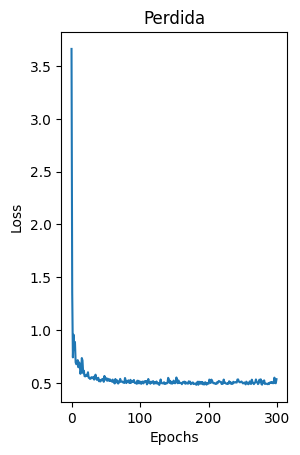

In [ ]:
capas = model.layers[0]
w, b = capas.get_weights()
print(f"Parámetros: w = {w[0][0]:.4f}, b = {b[0]:.4f}")

plt.subplot(1,2,1)
plt.plot(history.history["loss"])
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Perdida")